In [1]:
from supabase import create_client
import pandas as pd, os
from dotenv import load_dotenv

load_dotenv()

supabase = create_client(
    os.getenv("SUPABASE_URL"),
    os.getenv("SUPABASE_KEY")
)

data = supabase.table("churn_data").select("*").execute()
df = pd.DataFrame(data.data)
df.head()



,id,tenure,monthlycharges,totalcharges,churn,internetservice,contract,paymentmethod,tenure_group,monthly_charge_segment,has_internet_service,is_multi_line_user,contract_type_code
0,1,1,29.85,29.85,No,DSL,Month-to-month,Electronic check,New,Low,1,0,0
1,2,34,56.95,1889.50,No,DSL,One year,Mailed check,Regular,Medium,1,0,1
2,3,2,53.85,108.15,Yes,DSL,Month-to-month,Mailed check,New,Medium,1,0,0
3,4,45,42.30,1840.75,No,DSL,One year,Bank transfer (automatic),Loyal,Medium,1,0,1
4,5,2,70.70,151.65,Yes,Fiber optic,Month-to-month,Electronic check,New,High,1,0,0


In [4]:
churn_rate = (df["churn"].str.lower() == "yes").mean() * 100
print("Churn Rate:", churn_rate, "%")

Churn Rate: 25.6 %


In [6]:
avg_month = df.groupby("contract")["monthlycharges"].mean()
avg_month


contract
Month-to-month    67.297996
One year          68.184069
Two year          63.269838
Name: monthlycharges, dtype: float64

In [7]:
loyalty = {
    "new": len(df[df["tenure"] <= 12]),
    "regular": len(df[(df["tenure"] > 12) & (df["tenure"] <= 24)]),
    "loyal": len(df[(df["tenure"] > 24) & (df["tenure"] <= 48)]),
    "champion": len(df[df["tenure"] > 48]),
}

loyalty


{'new': 321, 'regular': 139, 'loyal': 223, 'champion': 317}

In [8]:
internet_dist = df["internetservice"].value_counts()
internet_dist


internetservice
Fiber optic    468
DSL            329
No             203
Name: count, dtype: int64

In [9]:
pivot_churn_tenure = pd.pivot_table(
    df,
    values="monthlycharges",
    index="tenure_group",
    columns="churn",
    aggfunc="count",
    fill_value=0
)

pivot_churn_tenure


churn,No,Yes
tenure_group,,
Champion,196,13
Loyal,169,33
New,164,154
Regular,212,56


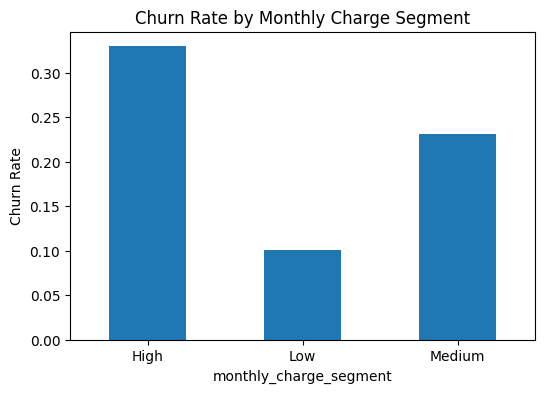

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df.groupby("monthly_charge_segment")["churn"].apply(lambda x: (x == "Yes").mean()).plot(kind="bar")
plt.title("Churn Rate by Monthly Charge Segment")
plt.ylabel("Churn Rate")
plt.xticks(rotation=0)
plt.show()


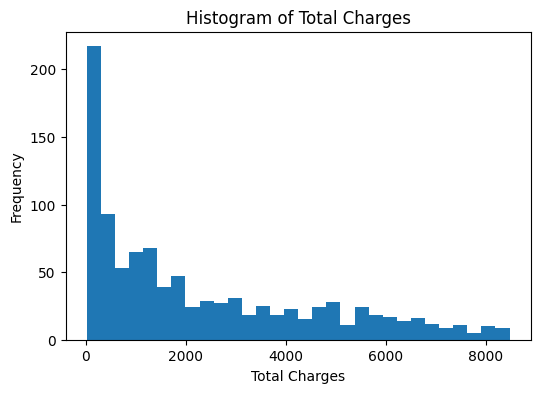

In [11]:
plt.figure(figsize=(6,4))
df["totalcharges"].plot(kind="hist", bins=30)
plt.title("Histogram of Total Charges")
plt.xlabel("Total Charges")
plt.show()


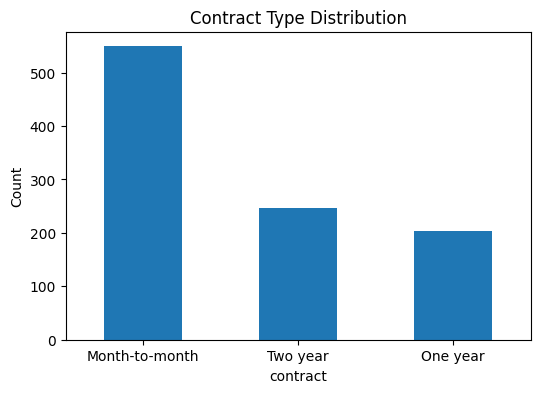

In [12]:
plt.figure(figsize=(6,4))
df["contract"].value_counts().plot(kind="bar")
plt.title("Contract Type Distribution")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [23]:
import os

processed_dir = os.path.join("data", "processed")
os.makedirs(processed_dir, exist_ok=True)

summary_path = os.path.join(processed_dir, "analysis_summary.csv")
df.to_csv(summary_path, index=False)

print("📁 Saved to:", summary_path)



📁 Saved to: data\processed\analysis_summary.csv
